# 1. Travelling Salesman Problem 

Travelling Salesman Problem (TSP) : Given a set of cities and distances between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point. 
Note the difference between Hamiltonian Cycle and TSP. The Hamiltonian cycle problem is to find if there exists a tour that visits every city exactly once. Here we know that Hamiltonian Tour exists (because the graph is complete) and in fact, many such tours exist, the problem is to find a minimum weight Hamiltonian Cycle. 
For example, consider the graph shown in the figure on the right side. A TSP tour in the graph is 1-2-4-3-1. The cost of the tour is 10+25+30+15 which is 80.
The problem is a famous NP-hard problem. There is no polynomial-time known solution for this problem. 

In [1]:
from IPython.display import Image

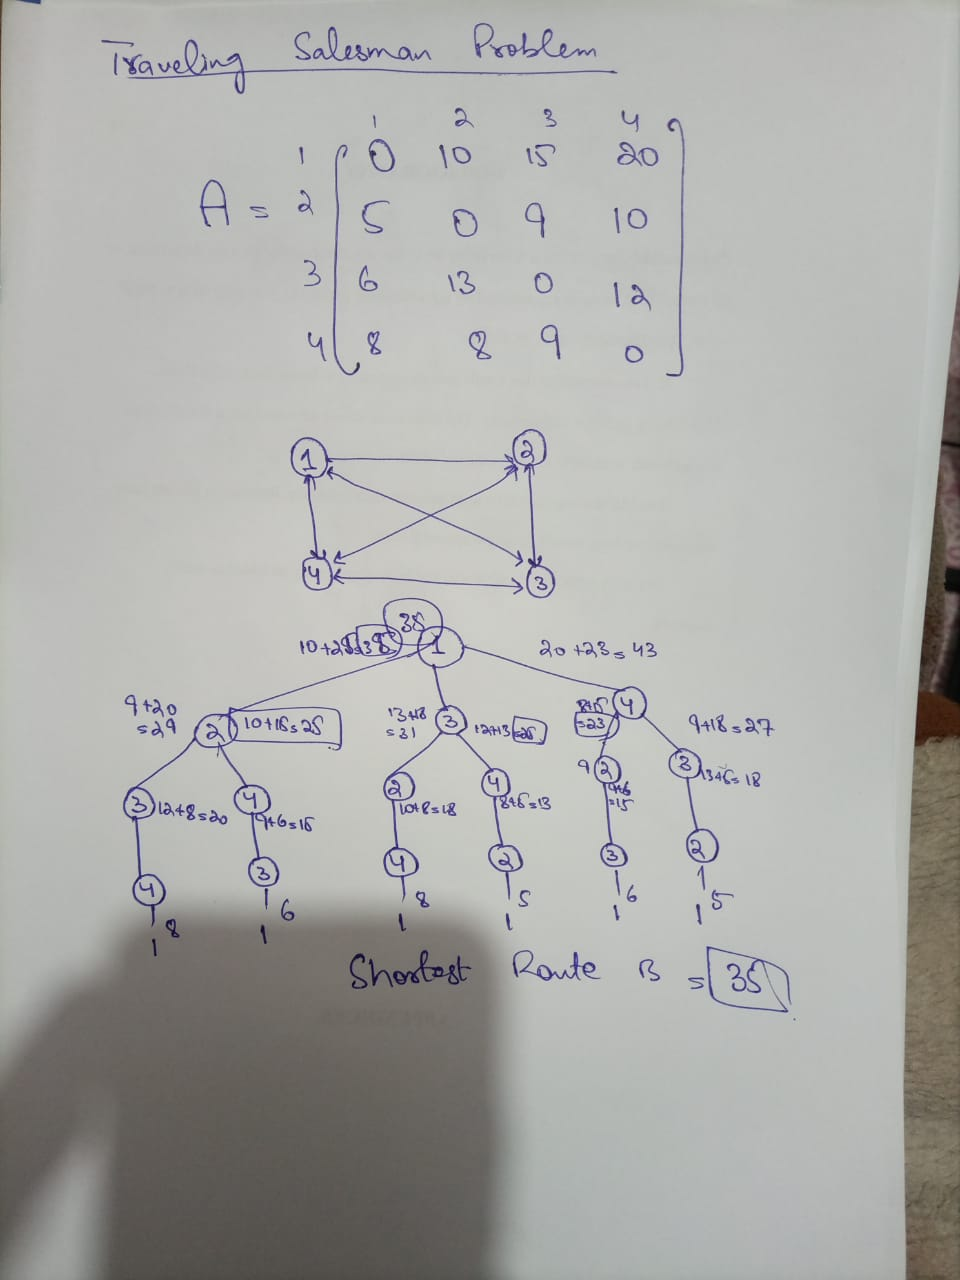

In [4]:
Image('WhatsApp Image 2021-12-15 at 1.27.07 AM.jpeg')

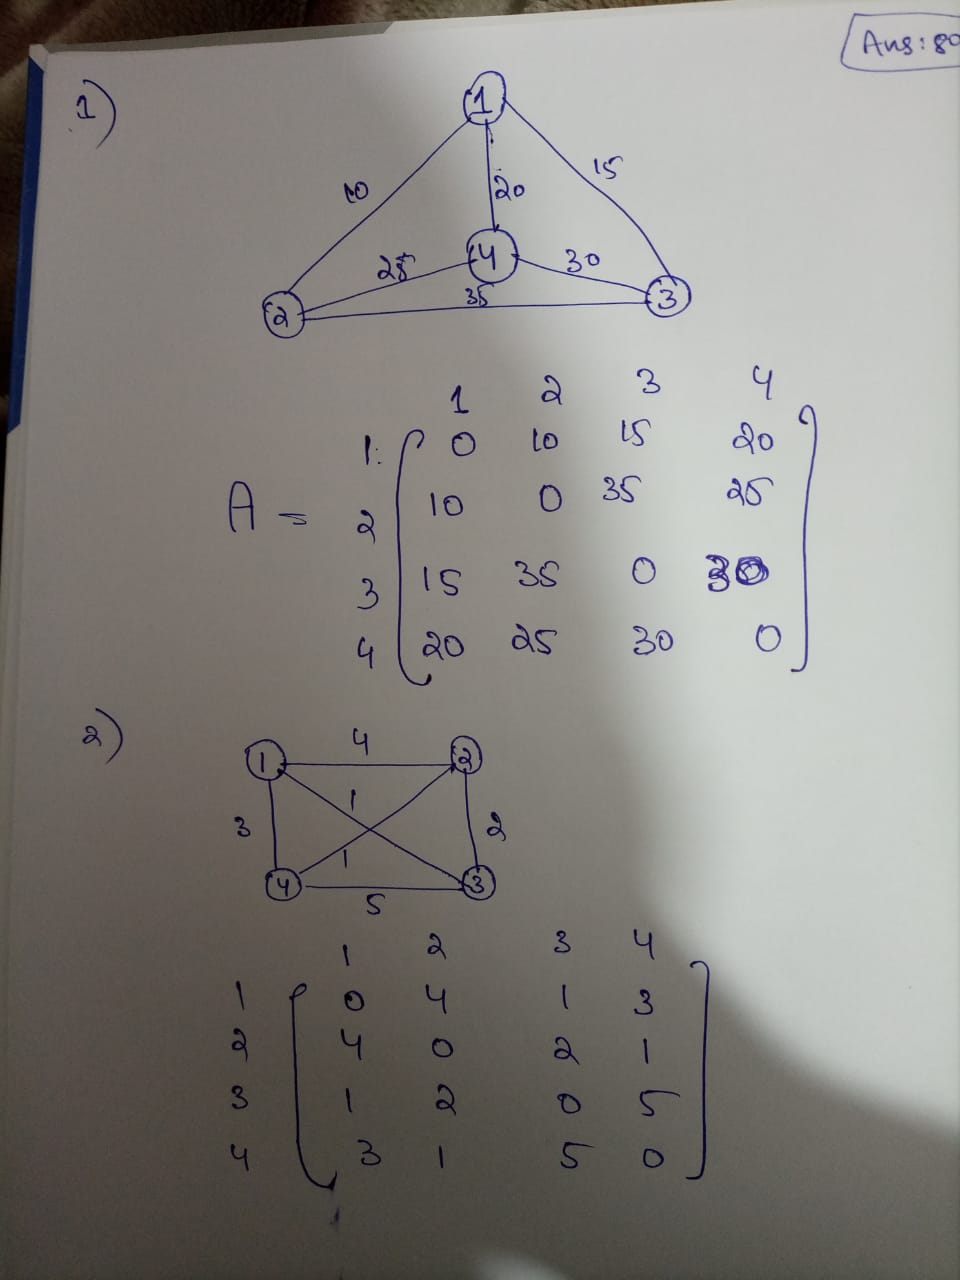

In [5]:
Image('WhatsApp Image 2021-12-15 at 1.27.08 AM.jpeg')

In [1]:
from sys import maxsize
from itertools import permutations
V = 4
 
# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
 
    # store all vertex apart from source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)
 
    # store minimum weight Hamiltonian Cycle
    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
 
        # update minimum
        min_path = min(min_path, current_pathweight)
         
    return min_path
 
 
# Driver Code
if __name__ == "__main__":
 
    # matrix representation of graph
    graph = [[0, 10, 15, 20], [10, 0, 35, 25],
            [15, 35, 0, 30], [20, 25, 30, 0]]
    s = 0
    print(travellingSalesmanProblem(graph, s))

80


# 2.Ford-Fulkerson Algorithm for Maximum Flow Problem

Given a graph which represents a flow network where every edge has a capacity. Also given two vertices source ‘s’ and sink ‘t’ in the graph, find the maximum possible flow from s to t with following constraints:
a) Flow on an edge doesn’t exceed the given capacity of the edge.
b) Incoming flow is equal to outgoing flow for every vertex except s and t.

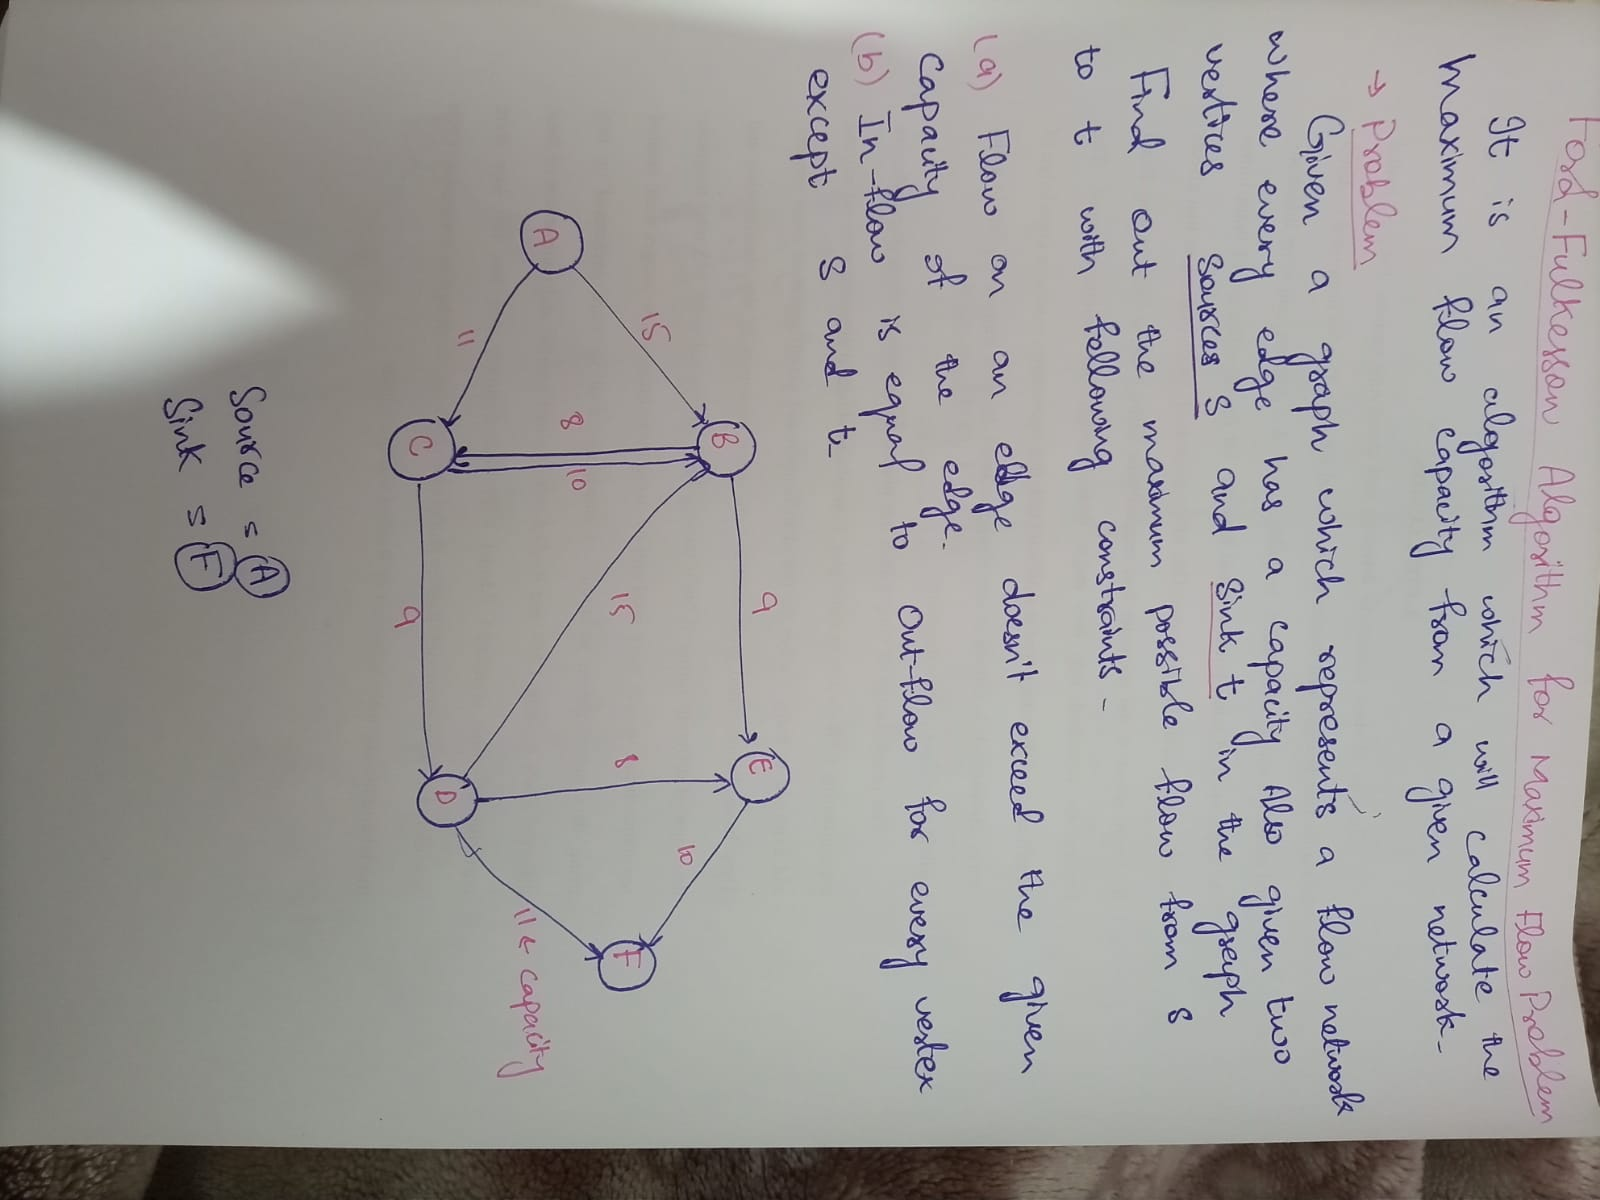

In [9]:
Image('abc1.jpeg')

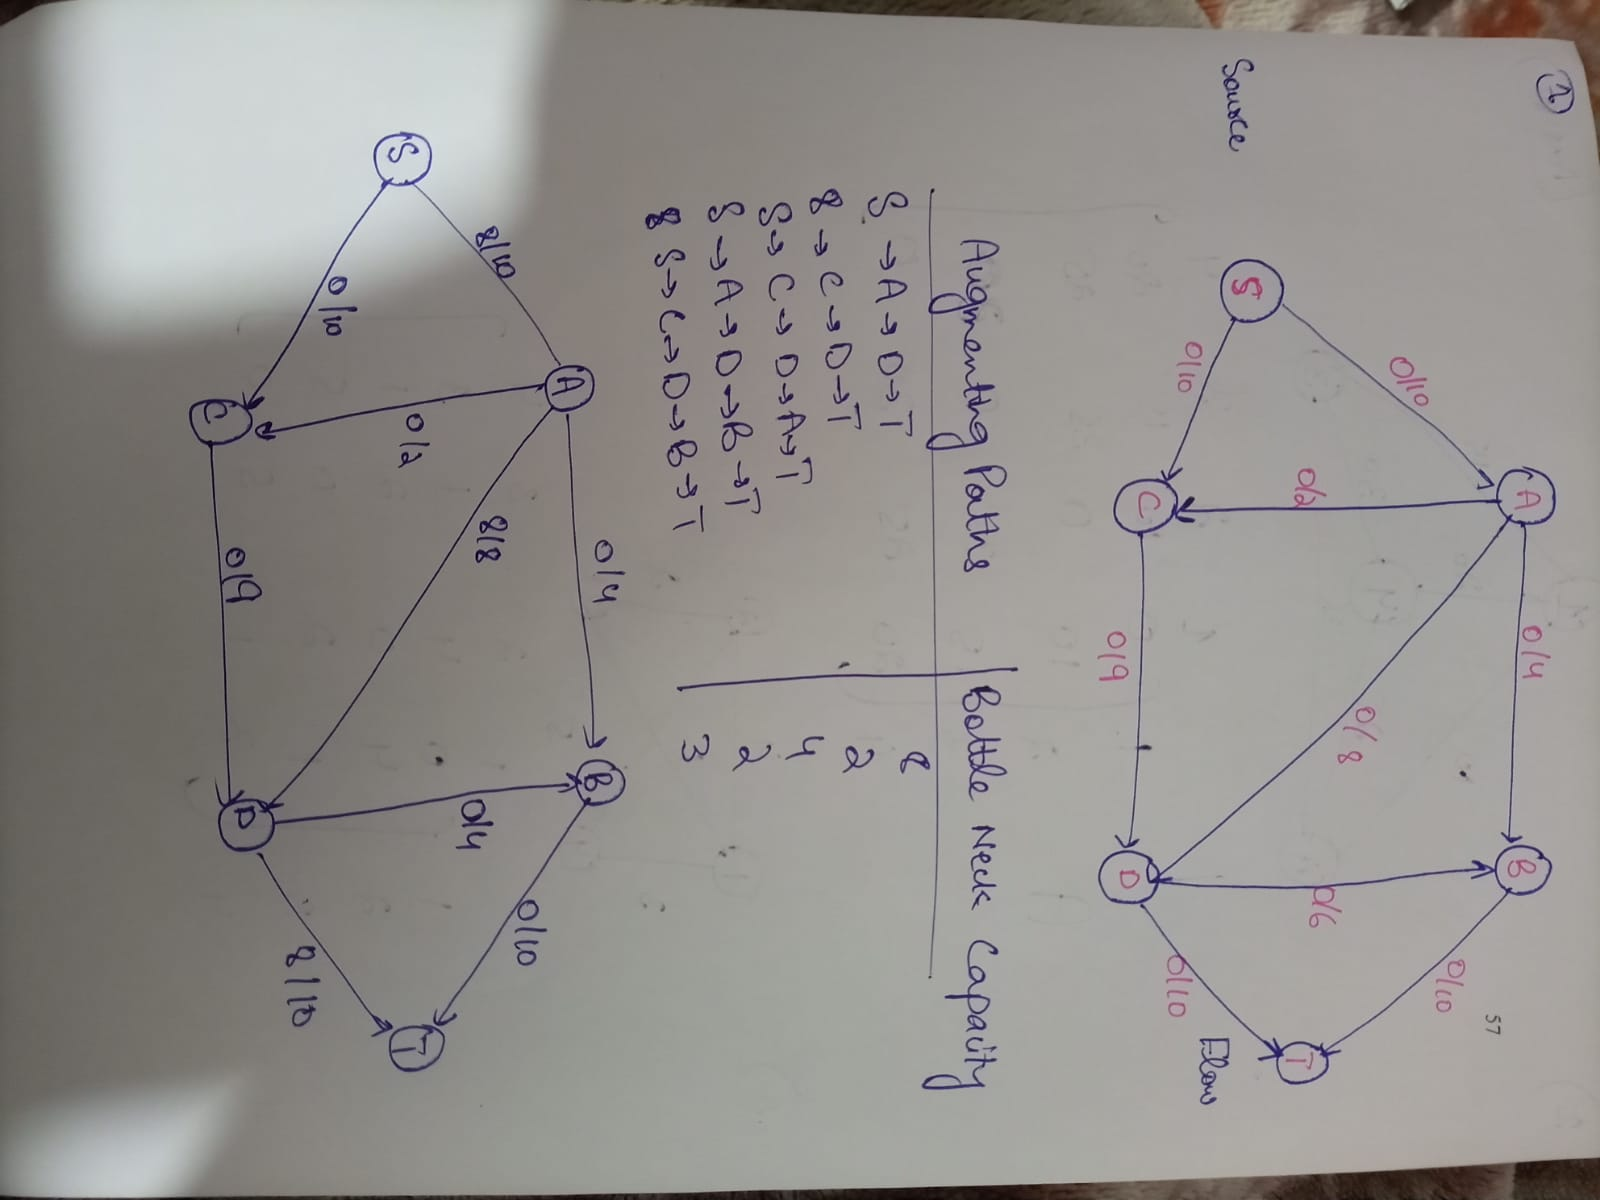

In [10]:
Image('abc2.jpeg')

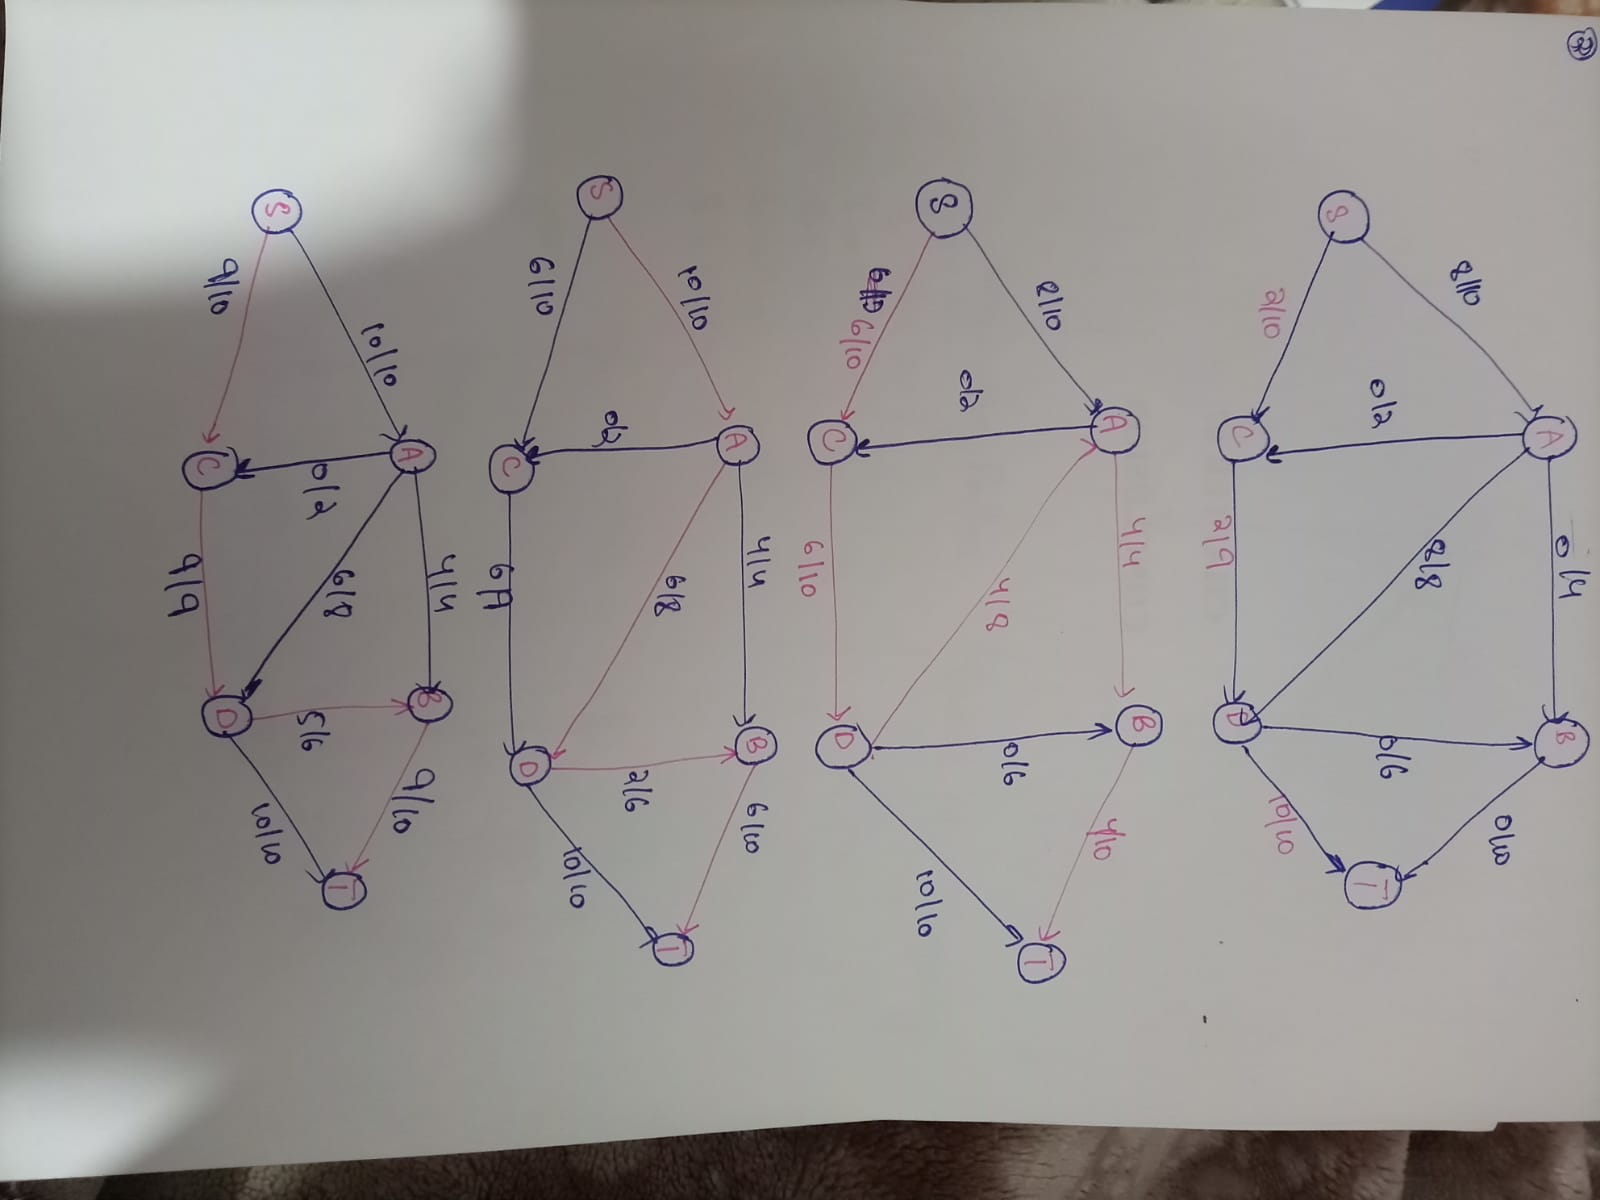

In [11]:
Image('abc3.jpeg')

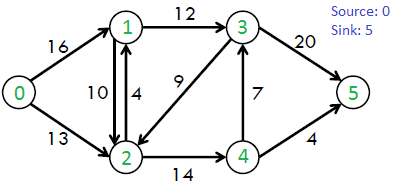

In [14]:
Image('ford_fulkerson11.png')

In [15]:

# Python program for implementation
# of Ford Fulkerson algorithm
from collections import defaultdict
 
# This class represents a directed graph
# using adjacency matrix representation
class Graph:
 
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self. ROW = len(graph)
        # self.COL = len(gr[0])
 
    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''
 
    def BFS(self, s, t, parent):
 
        # Mark all the vertices as not visited
        visited = [False]*(self.ROW)
 
        # Create a queue for BFS
        queue = []
 
        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True
 
         # Standard BFS Loop
        while queue:
 
            # Dequeue a vertex from queue and print it
            u = queue.pop(0)
 
            # Get all adjacent vertices of the dequeued vertex u
            # If a adjacent has not been visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                      # If we find a connection to the sink node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
 
        # We didn't reach sink in BFS starting
        # from source, so return false
        return False
             
     
    # Returns tne maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):
 
        # This array is filled by BFS and to store path
        parent = [-1]*(self.ROW)
 
        max_flow = 0 # There is no flow initially
 
        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :
 
            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s !=  source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]
 
            # Add path flow to overall flow
            max_flow +=  path_flow
 
            # update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while(v !=  source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
 
        return max_flow
 
  
# Create a graph given in the above diagram
 
graph = [[0, 16, 13, 0, 0, 0],
        [0, 0, 10, 12, 0, 0],
        [0, 4, 0, 0, 14, 0],
        [0, 0, 9, 0, 0, 20],
        [0, 0, 0, 7, 0, 4],
        [0, 0, 0, 0, 0, 0]]
 
g = Graph(graph)
 
source = 0; sink = 5
  
print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))

The maximum possible flow is 23 


# 3. Huffman Coding 

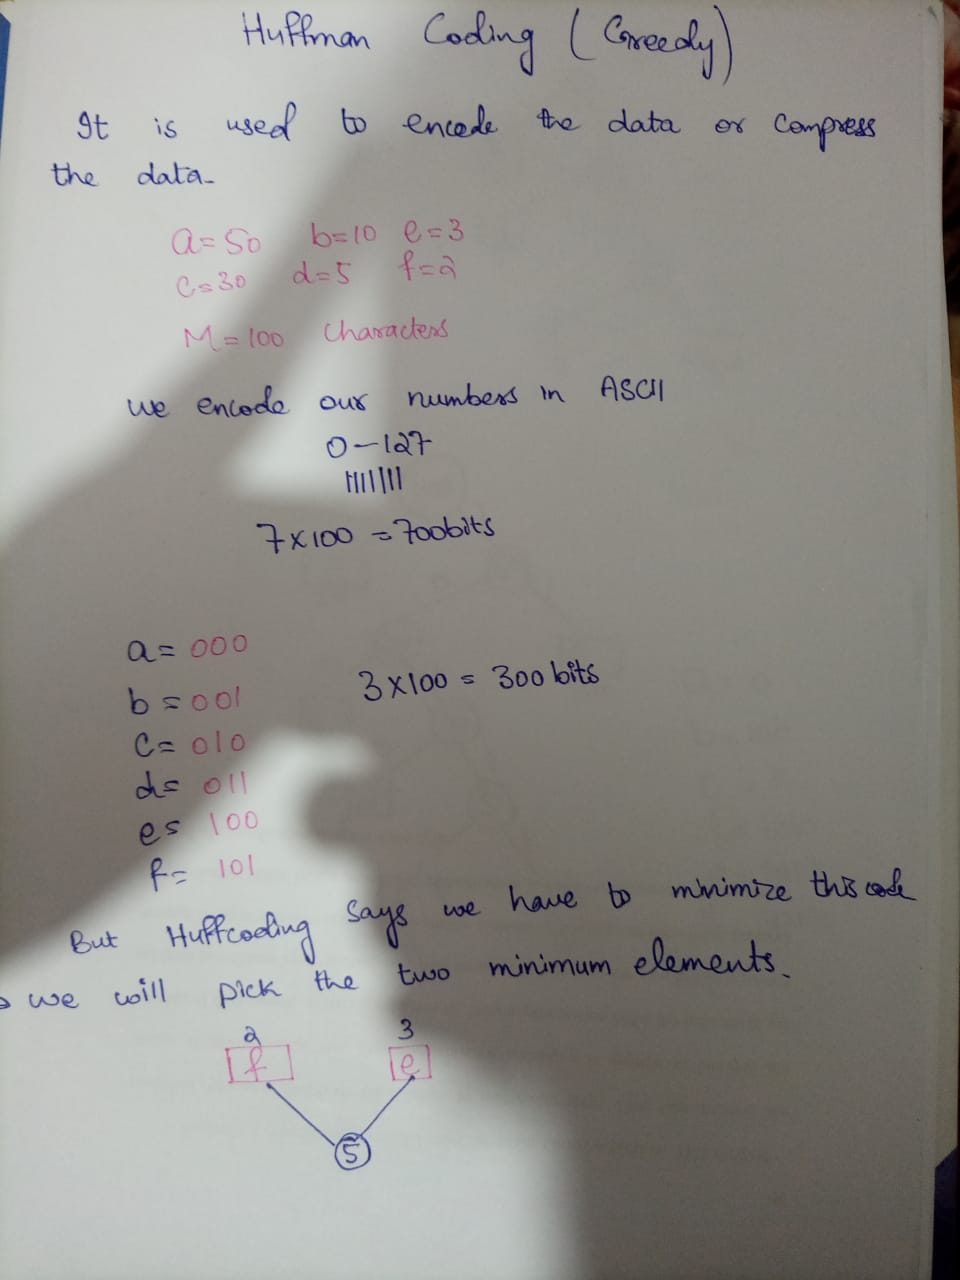

In [2]:
Image('WhatsApp Image 2021-12-15 at 11.09.01 PM (1).jpeg')

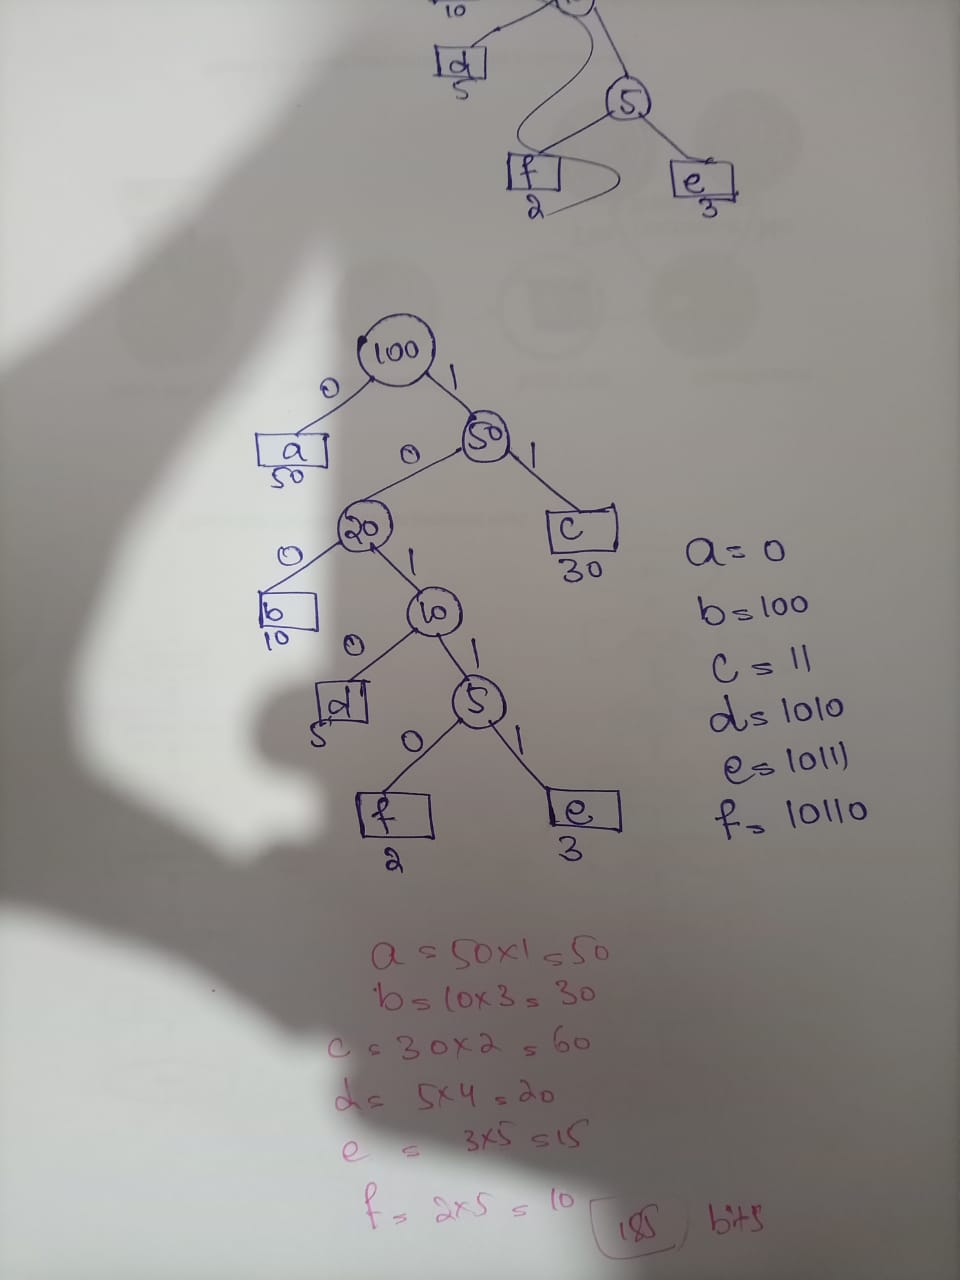

In [3]:
Image('WhatsApp Image 2021-12-15 at 11.09.01 PM.jpeg')

In [4]:
# Huffman Coding in python

string = 'BCAADDDCCACACAC'


# Creating tree nodes
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)


# Main function implementing huffman coding
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d


# Calculating frequency
freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

nodes = freq

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))

    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

huffmanCode = huffman_code_tree(nodes[0][0])

print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
----------------------
 'C'  |           0
 'A'  |          11
 'D'  |         101
 'B'  |         100


# 4. Airline Flight Agenda Scheduling Problem using Dijkstra’s Algorithm

## Problem Statement 
A travel agent requests software for making an agenda of flights for clients. The agent has access to a data base with all airports and flights. Besides the flight number, origin airport and destination, the flights have departure and arrival time. Specifically the agent wants to determine the earliest arrival time for the destination given an origin airport and start time.

## Problem Overview – Shortest Path Algorithm

This is the shortest path algorithm problem as we need to calculate the earliest arrival time, with a given start time. So, we can take the problem as a di graph where all the airports are nodes and the flights are the di edges with weight of time interval i.e. the time difference between arrival time of destination airport and departure time of source airport.

Here we need to take care that while going from origin airport to destination airport, and while taking flights from one airport to another, we can take only those flights which can be caught.

So, time plays an important role in this problem as we can take only the flights whose departure time from the airport is later than our arrival time at the airport.

So, to solve this we use Dijkstra’s Algorithm with a little modification.

### Dijkstra’s Algorithm Priority Queue
In Dijkstra’s algorithm, we start from a source node and initialize its distance by zero. Next, we push the source node to a priority queue with a cost equal to zero. After that, we perform multiple steps.

In each step, we extract the node with the lowest cost, update its neighbors’ distances, and push them to the priority queue if needed.

Each of the neighboring nodes is inserted with its respective new cost, which is equal to the cost of the extracted node plus the edge we just passed through. We continue to visit all nodes until there are no more nodes to extract from the priority queue. Then, we return the calculated distances.

### Our Algorithm Explained – Dijkstra Algorithm Example Explained

The algorithm for this problem is the slight modification of Dijkstra’s Algorithm. Here we have the database about airports and the flights. There is information about flight number, origin airport and destination, the flights have departure and arrival time. So, given origin and destination airports and start time we need to make our data structure properly to keep the data and find the shortest arrival time.

Here the di graph is used where the airports are the vertices and flights are di-edges with weights: departure time and arrival time. The distance should be the function of earliest arrival times at airports. Then based upon those earliest arrival time, we use a minimum priority queue for airports.

For the initial origin airport let the earliest arrival time be start time and for others it will be infinity in the beginning. Now, until the queue is not empty, adjacent loop is to be formed where we can only select the flights which can be caught, and we also want the flight with minimum arrival time.

So, for that we create another priority queue of flights where its departure time should be later than arrival time of another flight at the airport. And we also use another variable time, which is used to update the flight priority queue.

And finally, we perform relaxation, where if the above time is less than the earliest arrival time at adjacent airport, then we change the earliest arrival time of the airport to be the time and update in the airport queue

In [5]:
import queue

class Flight:
    def __init__(self, name, origin, dest, arrivalT, departT):
        self.name = name
        self.origin = origin
        self.dest = dest
        self.arrivalT = arrivalT
        self.departT = departT
        self.weight = departT - arrivalT

    def __str__(self):
        return str(self.origin) + " - " + str(self.dest)

    def __repr__(self):
        return self.__str__()

    def __lt__(self, other):
        return self.arrivalT < other.arrivalT


class Graph:
    def __init__(self, vertices):
        self.vertices = vertices

class Schedule:
    def __init__(self, vertex, time):
        self.vertex = vertex
        self.time = time

    def __hash__(self):
        return hash(str(self.vertex) + ":" + str(self.time))

    def __lt__(self, other):
        return self.time < other.time

    def __str__(self):
        return "{" + str(self.vertex) + ":" + str(self.time) + "}"

    def __repr__(self):
        return self.__str__()

    def __eq__(self, other):
        if isinstance(other, Schedule):
            return (self.vertex == other.vertex) and (self.time == other.time)
        return False

class Vertex:

    def __init__(self, name, adjacentVertices):
        self.name = name
        self.adjacentVertices = adjacentVertices

    def __str__(self):
        return self.name

    def __repr__(self):
        return self.__str__()

    def __eq__(self, other):
        if isinstance(other, Vertex):
            return self.adjacentVertices == other.adjacentVertices
        return False

    def __hash__(self):
        return hash(str(self.name))


def FlightAgency(F, G, s, d, startT):

    T = {}
    T[s] = startT

    # for all vertex, v != s do T[v] ← infinity
    for vertex in G.vertices:
        if(vertex is not s):
            T[vertex] = float("inf")

    # Priority Queue, q, of vertices keyed by T
    q = queue.PriorityQueue()
    for vertex in G.vertices:
        q.put(Schedule(vertex, T[vertex]))

    while not q.empty():
        v = q.get()

        for adjacentVertex in v.vertex.adjacentVertices:
            if Schedule(adjacentVertex, T[adjacentVertex]) in q.queue:

                p = queue.PriorityQueue()
                for flight in F:
                    if(flight.origin == v.vertex and 
                    flight.dest == adjacentVertex):
                        if(flight.departT >= T[v.vertex]):
                            p.put(flight)

                t = float("inf")

                if not p.empty():
                    t = p.queue[0].arrivalT

                # relaxation
                if t < T[adjacentVertex]:
                    T[adjacentVertex] = t
                    q.put(Schedule(adjacentVertex, t))

            else:
                break
    
    earliestTime = T[d]
    
    return earliestTime

### Breaking Down the Code:
Here we create some classes. First there is the class Graph, which will have vertices. Then there is Vertex class for the airport which will have the airport details. Class flight will have the flight name, origin, destination, arrival time and departure time.

As we have mentioned earlier, the flight difference between the arrival and departure time will be the weights. For listing the flight schedules, we have created a Schedule class.

Then there is the main function FlightAgency(), which calculates the required earliest arrival time using the algorithm above.

In [6]:
# The airports as vertices
airportE = Vertex("E", [])
airportD = Vertex("D", [airportE])
airportB = Vertex("B", [airportD, airportE])
airportC = Vertex("C", [airportB])
airportA = Vertex("A", [airportC, airportB])

def run():

    # List the flights for airports
    flights = [
        Flight('FN-101', airportA, airportB,  6, 2),
        Flight('FN-102', airportA, airportC,  8, 2),
        Flight('FN-103', airportB, airportD,  13, 12),
        Flight('FN-104', airportB, airportE,  17, 11),
        Flight('FN-105', airportC, airportB,  10, 9),
        Flight('FN-106', airportC, airportD,  10, 6,),
        Flight('FN-107', airportD, airportE,  14, 13),
    ]

    # Graph with airports as vertices
    graph = Graph([airportA, airportB, airportC, airportD, airportE])

    # Origin Airport be airportA and destination be airportE
    startVertex = airportA
    endVertex = airportE
    # Start time be 2 (Time in 24 hour format)
    startT = 2

    earliestArrivalTime = FlightAgency(flights, graph, startVertex, endVertex, startT)
    if (earliestArrivalTime != float("inf")):
        print(f'The earliest arrival time for the airport {endVertex} from airport {startVertex} is {earliestArrivalTime}:00.')
    else:
        print(f'No flight from airport {startVertex} to airport {endVertex} after {startT}:00.')

if __name__ == '__main__':
    run()

The earliest arrival time for the airport E from airport A is 14:00.


So, for our main program we made following setup:

1. Airport A, B, C, D, E as the vertices of the Graph G.
2. The list of 7 flights:
3. FN-101: From airport A to B with departure time 02:00 and arrival time 06:00
4. FN-102: From airport A to C with departure time 02:00 and arrival time 08:00
5. FN-103: From airport B to D with departure time 12:00 and arrival time 13:00
6. FN-104: From airport B to E with departure time 11:00 and arrival time 17:00
7. FN-105: From airport C to B with departure time 09:00 and arrival time 10:00
8. FN-106: From airport C to D with departure time 06:00 and arrival time 10:00
9. FN-107: From airport D to E with departure time 13:00 and arrival time 14:00<br>
The flights are the edges.<br>
Airport A as the origin airport.<br>
Airport E as the destination airport.<br>
02:00 as the start time.<br>
Finally, we call the FlightAgency function.